# **Import Libraries**

In [1]:
# Checking data
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# Visualization
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.graphics.gofplots import qqplot

# Ignore Warning
import warnings

### **Set Up Libraries**

In [2]:
warnings.simplefilter('ignore')

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

# **Data Collection**

In [3]:
data = pd.read_csv("data_umkm_kabupaten_kota.csv") # load data

data_copy = data.copy(deep=True)

# **Data Preprocessing**

In [4]:
data # cek Keseluruhan Data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,375048,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,269002,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,250808,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,353277,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,259141,UNIT,2016
...,...,...,...,...,...,...,...,...
157,158,32,JAWA BARAT,3275,KOTA BEKASI,274143,UNIT,2021
158,159,32,JAWA BARAT,3276,KOTA DEPOK,219238,UNIT,2021
159,160,32,JAWA BARAT,3277,KOTA CIMAHI,76833,UNIT,2021
160,161,32,JAWA BARAT,3278,KOTA TASIKMALAYA,123010,UNIT,2021


In [5]:
data.isnull().mean().to_frame() # cek missing data

,0
id,0.0
kode_provinsi,0.0
nama_provinsi,0.0
kode_kabupaten_kota,0.0
nama_kabupaten_kota,0.0
jumlah_umkm,0.0
satuan,0.0
tahun,0.0


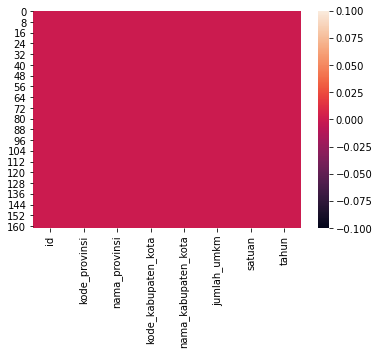

In [6]:
sns.heatmap(data.isnull())
plt.show()

In [7]:
data.dtypes.to_frame() # cek type data

,0
id,int64
kode_provinsi,int64
nama_provinsi,object
kode_kabupaten_kota,int64
nama_kabupaten_kota,object
jumlah_umkm,int64
satuan,object
tahun,int64


In [8]:
data.info() # getting information bout the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_umkm          162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [9]:
data.describe() # cek statistical measure

,id,kode_provinsi,kode_kabupaten_kota,jumlah_umkm,tahun
count,162.000000,162.0,162.000000,162.000000,162.000000
mean,81.500000,32.0,3231.333333,200506.617284,2018.500000
std,46.909487,0.0,31.298602,116480.186111,1.713121
min,1.000000,32.0,3201.000000,25896.000000,2016.000000
25%,41.250000,32.0,3207.000000,102917.000000,2017.000000
50%,81.500000,32.0,3214.000000,191241.500000,2018.500000
75%,121.750000,32.0,3273.000000,276270.000000,2020.000000
max,162.000000,32.0,3279.000000,506347.000000,2021.000000


In [10]:
data.describe(include='all') # cek statistical measure

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_umkm,satuan,tahun
count,162.000000,162.0,162,162.000000,162,162.000000,162,162.000000
unique,NaN,NaN,1,NaN,27,NaN,1,NaN
top,NaN,NaN,JAWA BARAT,NaN,KABUPATEN CIANJUR,NaN,UNIT,NaN
freq,NaN,NaN,162,NaN,6,NaN,162,NaN
mean,81.500000,32.0,NaN,3231.333333,NaN,200506.617284,NaN,2018.500000
std,46.909487,0.0,NaN,31.298602,NaN,116480.186111,NaN,1.713121
min,1.000000,32.0,NaN,3201.000000,NaN,25896.000000,NaN,2016.000000
25%,41.250000,32.0,NaN,3207.000000,NaN,102917.000000,NaN,2017.000000
50%,81.500000,32.0,NaN,3214.000000,NaN,191241.500000,NaN,2018.500000
75%,121.750000,32.0,NaN,3273.000000,NaN,276270.000000,NaN,2020.000000


# **Data Analysis**

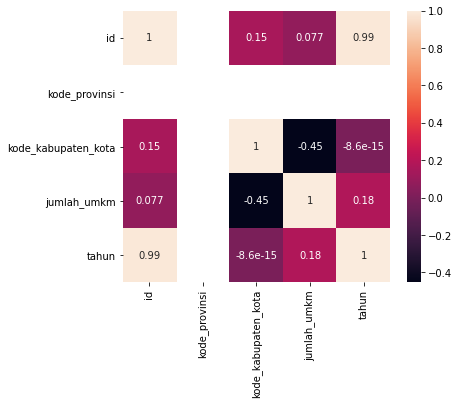

In [11]:
# correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# **Univariate Analysis**

### **Apakah bentuk distribusi dari Jumlah UMKM**

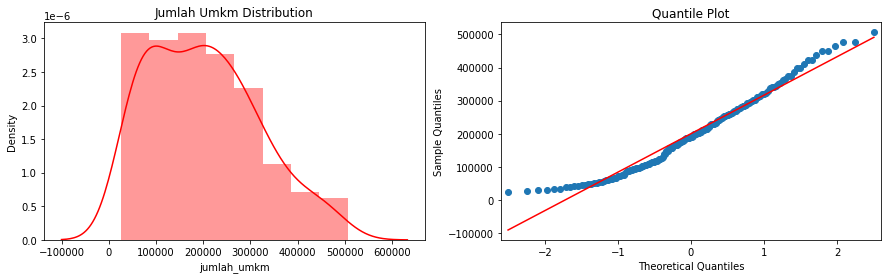

In [12]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['jumlah_umkm'], 
    ax=ax1 , 
    color ='red'
)

ax1.set(title='Jumlah Umkm Distribution')

qqplot(
    data['jumlah_umkm'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Skewed Right**.

### **Apakah bentuk distribusi dari Kode Kabupaten dan Kota**

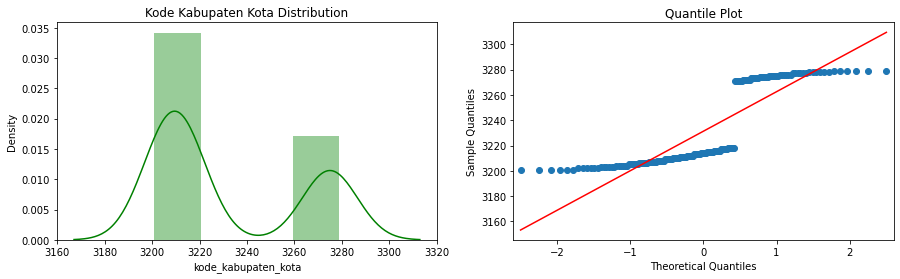

In [13]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_kabupaten_kota'], 
    ax=ax1 , 
    color ='green'
)

ax1.set(title='Kode Kabupaten Kota Distribution')

qqplot(
    data['kode_kabupaten_kota'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Skewed Right**.

### **Apakah bentuk distribusi dari Kode Provinsi?**

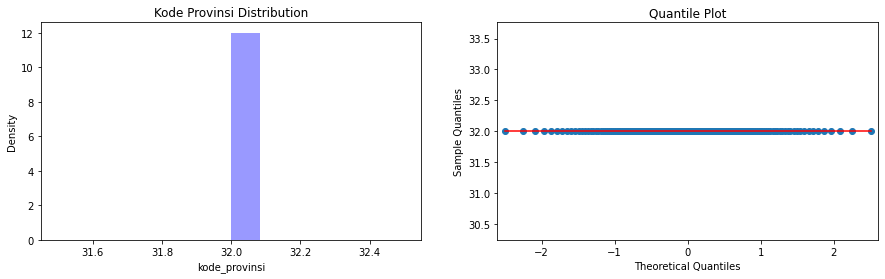

In [14]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_provinsi'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Kode Provinsi Distribution')

qqplot(
    data['kode_provinsi'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Normal Distribution**.

### **Apakah bentuk distribusi dari Tahun?**

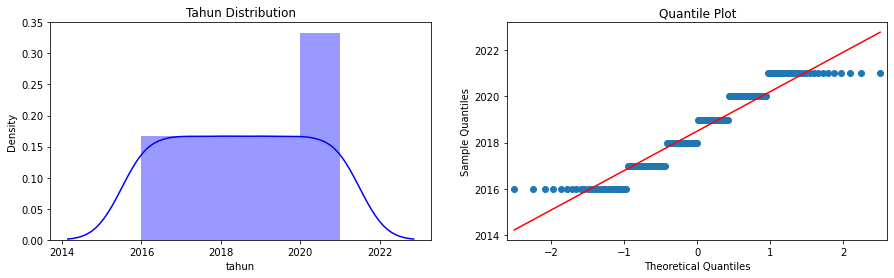

In [15]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['tahun'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Tahun Distribution')

qqplot(
    data['tahun'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Normal Distribution**.

In [16]:
# checking skewness value 
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed

skew_value = data.skew().sort_values(ascending=False)
skew_value

kode_kabupaten_kota    0.662289
jumlah_umkm            0.486108
id                     0.000000
kode_provinsi          0.000000
tahun                  0.000000
dtype: float64

# **Bivariate Analysis**

### **Function**

In [17]:
def bivariate_visualization_bar(data, x, y, color):
    
    """
    Returning Bar Plot Visualization
    for bivariate analysis
    
    data = data
    x = x axis
    y = y axis
    color = color/hue
    title = 'put your title here'
    
    """
    
    fig = px.bar(
        data,
        x=x,
        y=y,
        color=color
    )
    
    return fig.show()

def bivariate_visualization_pie(data, names, title, hole, template='gridon'):
    
    """
    Returning Pie Plot Visualization
    for bivariate analysis
    
    data = data
    names = names
    hole = hole (0.5 / 0,4)
    title = 'put your title here'
    template = template (default 'gridon')
    
    """
    
    fig = px.pie(
        data,
        names=names,
        hole=hole,
        title=title,
        template=template
    )
    
    return fig.show()

def bivariate_visualization_scatter(data, y, x, color, title, template='plotly_dark', trendline='ols'):
    
    """
    Returning Scatter Visualization
    for bivariate analysis
    
    data = data
    y = y axis
    x = x axis
    color = color/hue
    template = template (default 'plotly_dark')
    trendline = trendline (default 'ols')
    
    """
    
    fig = px.scatter(
        data,
        y=y,
        x=x,
        color=color,
        title=title,
        template=template,
        trendline=trendline
    )

    return fig.show()

## **Visualization**

### **Tahun manakah yang memiliki Jumlah UMKM terbanyak?**

In [27]:
bivariate_visualization_bar(
    data=data,
    x=data['tahun'],
    y=data['jumlah_umkm'],
    color=data['nama_kabupaten_kota']
)

> Tahun **2021** memiliki **Jumlah UMKM** terbanyak.

### **Nama Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak dalam setiap tahunnya?**

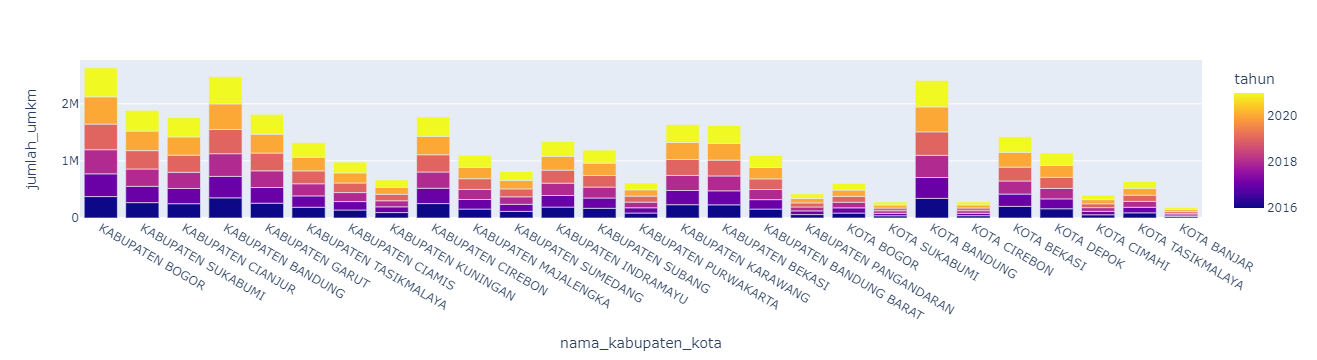

In [28]:
bivariate_visualization_bar(
    data=data,
    x=data['nama_kabupaten_kota'],
    y=data['jumlah_umkm'],
    color=data['tahun']
)

> Nama Kabupaten dan Kota yang memiliki **Jumlah UMKM** terbanyak adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Nama Kabupaten dan Kota manakah yang memiliki nilai Jumlah UMKM terbanyak?**

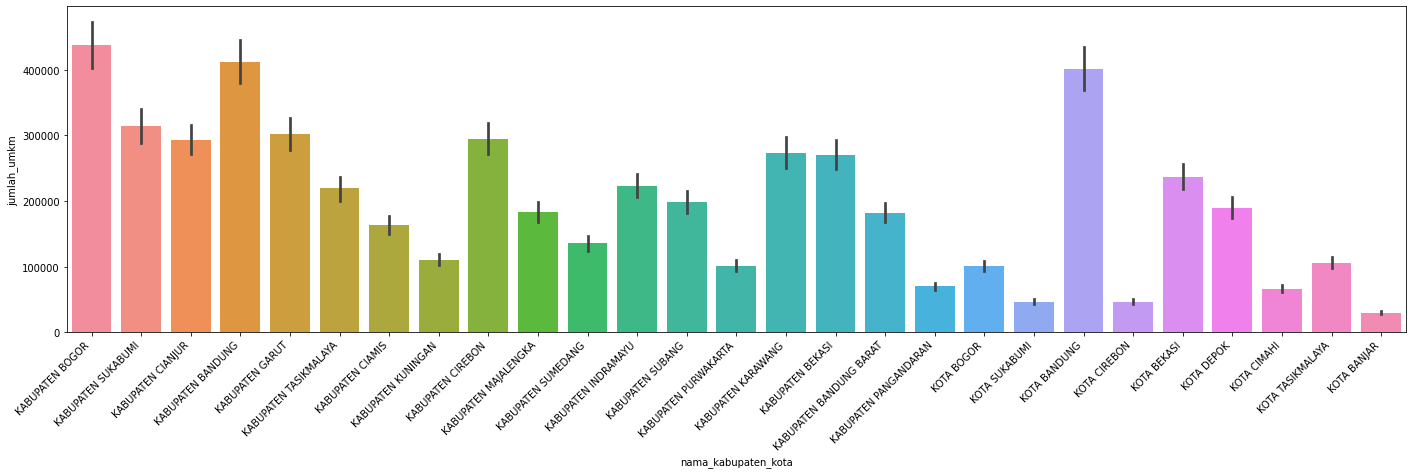

In [19]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> Nama Kabupaten dan Kota yang memiliki **Jumlah UMKM** terbanyak adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Berapa persen kah nilai kemunculan Nama Kabupaten dan Kota dalam data?**

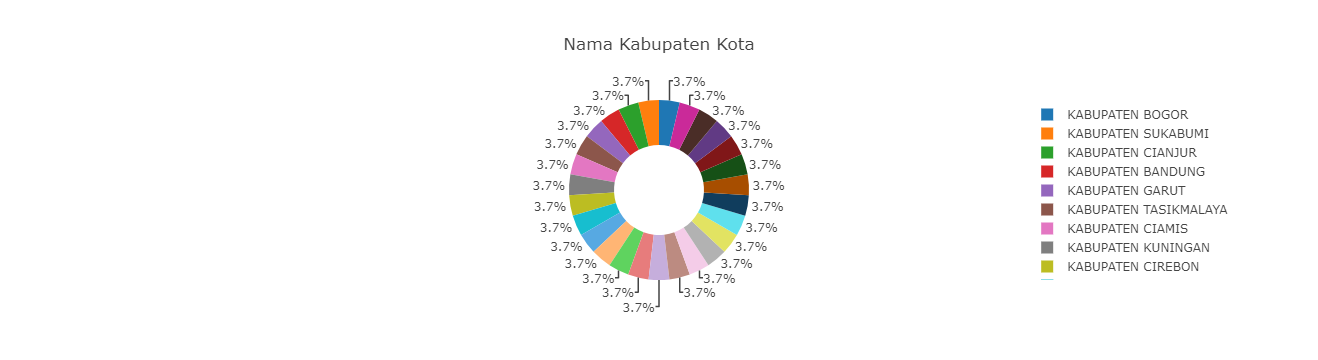

In [20]:
bivariate_visualization_pie(
    data=data,
    names='nama_kabupaten_kota',
    title='Nama Kabupaten Kota',
    hole=0.5
)

> Frekuensi kemunculan **nama kabupaten dan Kota** bernilai sama, yaitu 3.7%.

### **Berapa persen kah nilai kemunculan Nama Provinsi dalam data?**

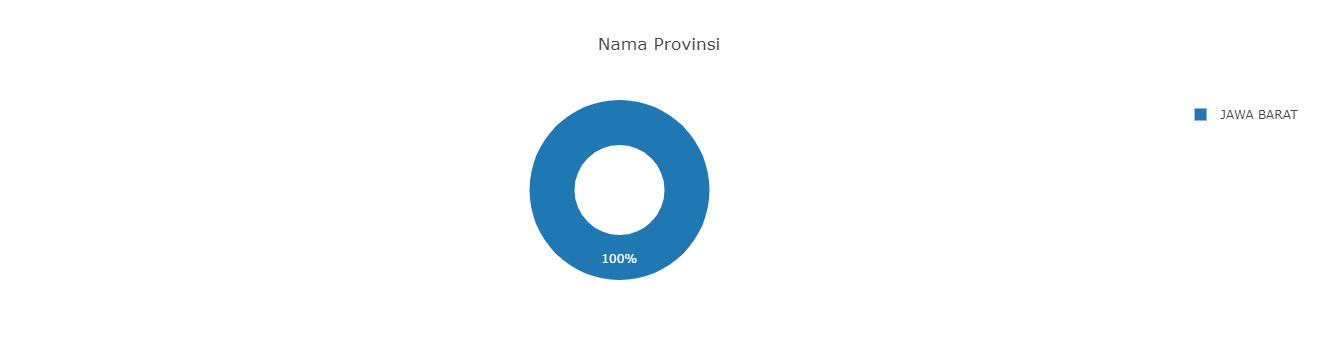

In [21]:
bivariate_visualization_pie(
    data=data,
    names='nama_provinsi',
    title='Nama Provinsi',
    hole=0.5
)

> Frekuensi kemunculan **Nama Provinsi** semua **Jawa Barat** 100%.

### **Berapa persen kah nilai kemunculan Satuan Unit dalam data?**

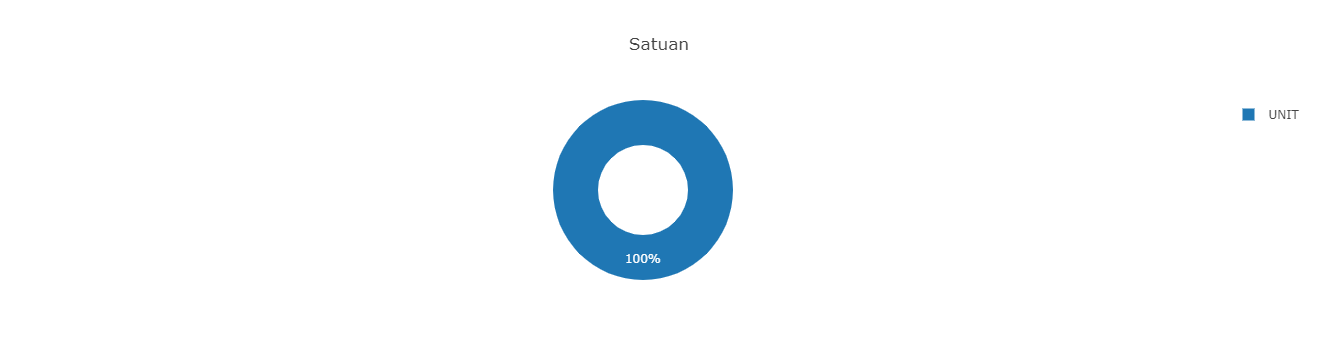

In [22]:
bivariate_visualization_pie(
    data=data,
    names='satuan',
    title='Satuan',
    hole=0.5
)

> Frekuensi kemunculan **Satuan Unit** semuanya sama 100%.

### **Nama Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak?**

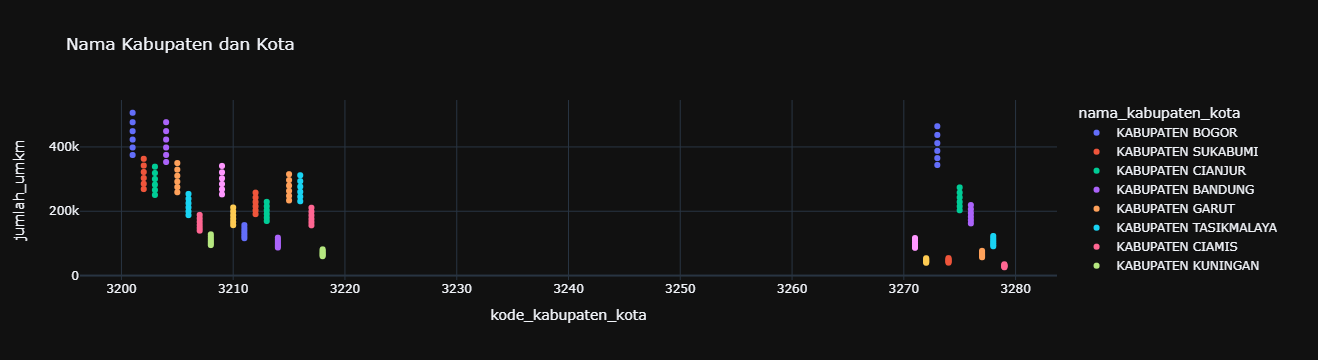

In [23]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> Nama Kabupaten dan Kota yang memiliki Jumlah UMKM terbanyak adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Provinsi Manakah yang memiliki frekuensi kemunculan yang banyak?**

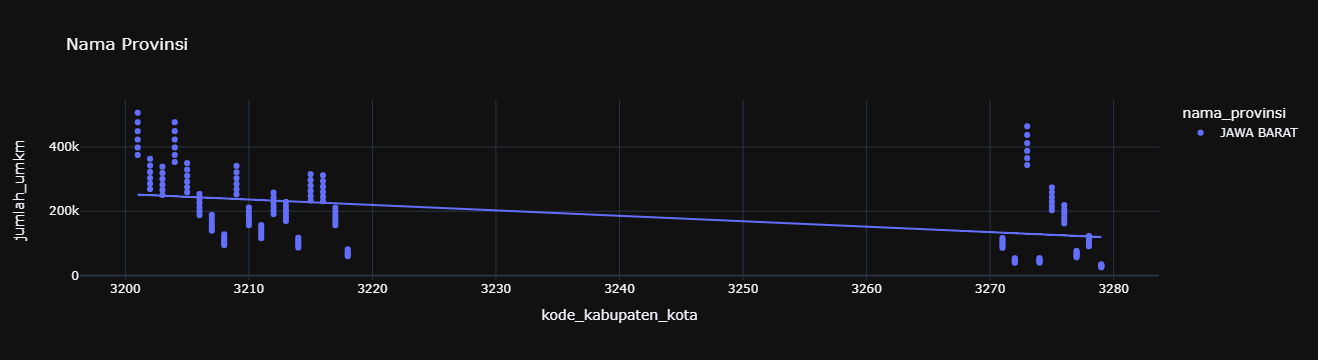

In [24]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_provinsi',
    title='Nama Provinsi'
)

> Provinsi yang memiliki frekuensi kemunculan yang banyak adalah **Jawa Barat**.

### **Satuan apakah yang memiliki frekuensi kemunculan yang banyak?**

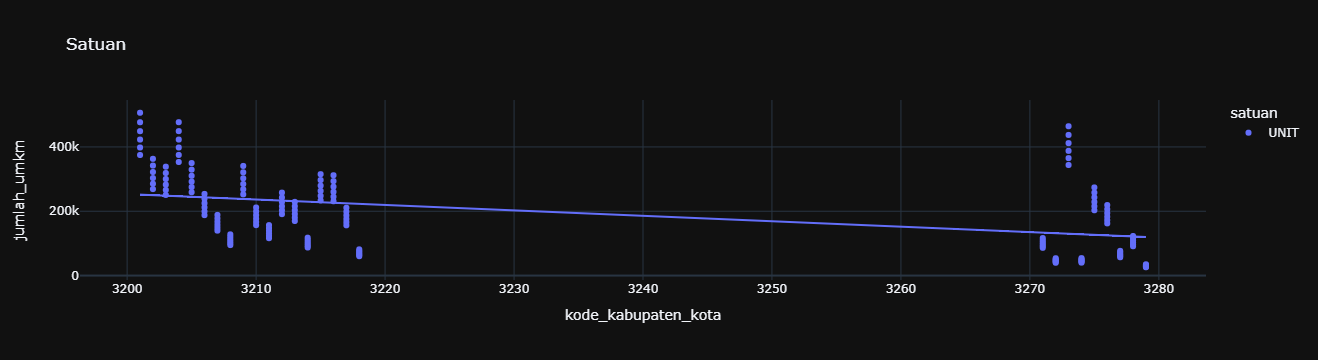

In [25]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='satuan',
    title='Satuan'
)

> Satuan yang memiliki frekuensi kemunculan yang banyak adalah **UNIT**.

### **Di Tahun berapakah Nama Kabupaten dan Kota memiliki Jumlah UMKM terbanyak?**

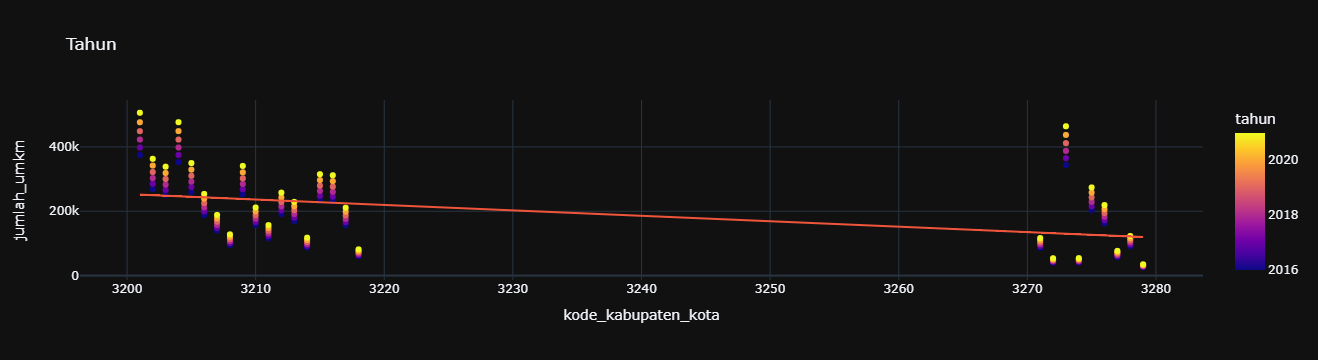

In [26]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='tahun',
    title='Tahun'
)

> Dominan Nama Kabupaten dan Kota yang memiliki **Jumlah UMKM** terbanyak adalah di **Tahun 2021**.

# **Multivariate Analysis**

### **Kategori Usaha dengan visualisasi Multivariate**

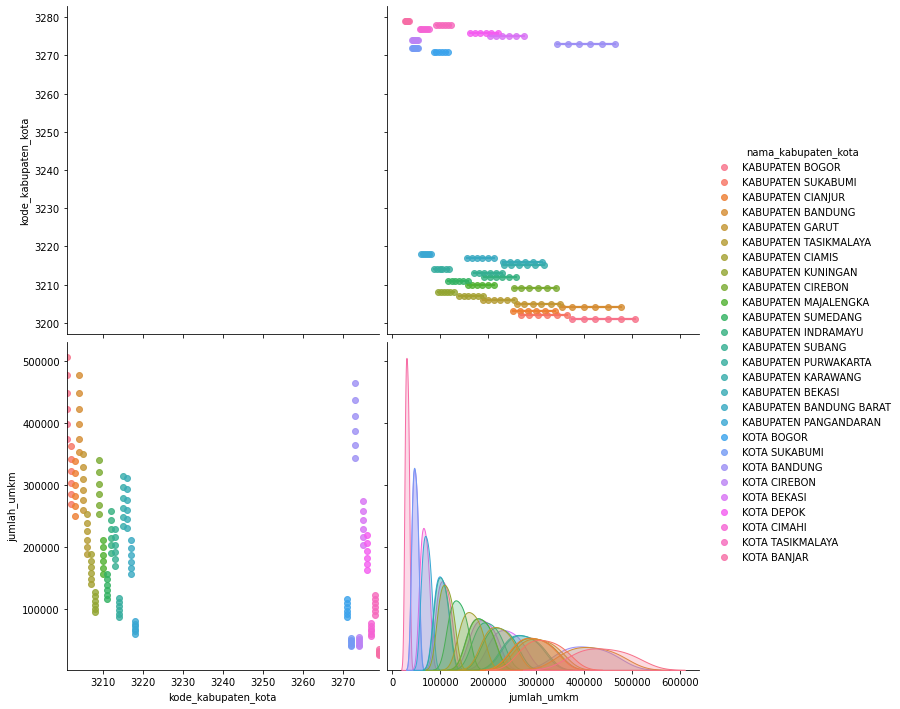

In [29]:
sns.pairplot(
    data=data, 
    vars=['kode_kabupaten_kota', 'jumlah_umkm'], 
    hue='nama_kabupaten_kota', 
    kind='reg', 
    diag_kind='kde', 
    size=5, 
    palette='husl'
)

plt.show()

### **Pairplot Overall Data**

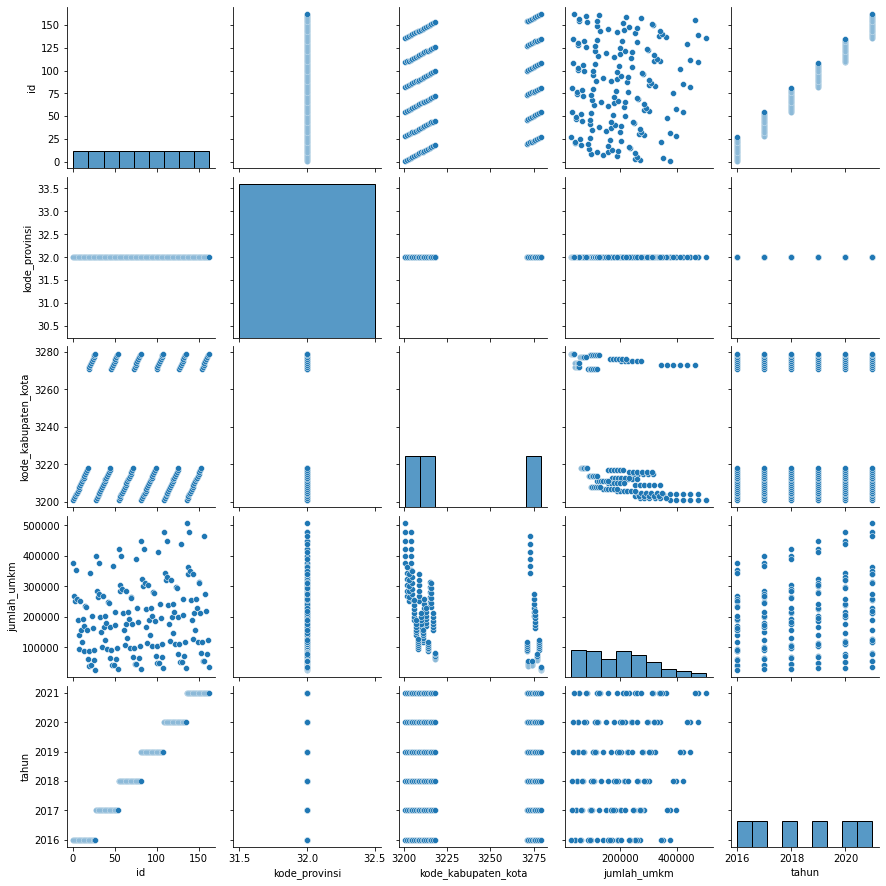

In [30]:
sns.pairplot(data)

# **Kesimpulan:**

* Data memiliki **1350 baris** dan **9 kolom**.
* Data tidak memiliki nilai kosong atau **NaN**.
* Data memiliki **4 tipe object data** dan **5 tipe numeric data**.

* Data Numeric diatas memiliki 2 data yang **Skewed/Miring** yaitu **jumlah_umkm dan kode_kabupaten_kota** dan 3 data berbentuk **Normal Distribution** yaitu **kode_provinsi, id, dan tahun**.

* Data bertipe **object** memiliki frekuensi kemunculan yang sama

Data diatas menunjukan bahwa Kabupaten Bogor memiliki Jumlah UMKM terbanyak di Kategori Usaha Kuliner yaitu 181.187 ribu unit usaha, dan disusul dengan Kabupaten Bandung dengan 170.669 ribu unit usaha di tahun 2021.

# **Encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        label_encoder.fit_transform(list(data[i].values))
        data[i] = label_encoder.transform(data[i].values)
        
        for j in data.columns:
            if data[j].dtype == 'int':
                data[j] = data[j].astype('float64')

In [32]:
data, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   162 non-null    int64  
 1   kode_provinsi        162 non-null    int64  
 2   nama_provinsi        162 non-null    float64
 3   kode_kabupaten_kota  162 non-null    int64  
 4   nama_kabupaten_kota  162 non-null    float64
 5   jumlah_umkm          162 non-null    int64  
 6   satuan               162 non-null    float64
 7   tahun                162 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 10.2 KB


(      id  kode_provinsi  nama_provinsi  kode_kabupaten_kota  nama_kabupaten_kota  jumlah_umkm  \
 0      1             32            0.0                 3201                  3.0       375048   
 1      2             32            0.0                 3202                 15.0       269002   
 2      3             32            0.0                 3203                  5.0       250808   
 3      4             32            0.0                 3204                  0.0       353277   
 4      5             32            0.0                 3205                  7.0       259141   
 ..   ...            ...            ...                  ...                  ...          ...   
 157  158             32            0.0                 3275                 20.0       274143   
 158  159             32            0.0                 3276                 24.0       219238   
 159  160             32            0.0                 3277                 22.0        76833   
 160  161           

# **Splitting Data**

In [33]:
X = data.drop(columns=['jumlah_umkm', 'id'])
y = data['jumlah_umkm']

X.shape, y.shape

((162, 6), (162,))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113, 6), (49, 6), (113,), (49,))

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

# **Model Building**

### **RandomForestRegressor**

In [36]:
pipe_random_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', RandomForestRegressor())
])

pipe_random_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', RandomForestRegressor())])

In [37]:
pred_test_rfr = pipe_random_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_rfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_rfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_rfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_rfr))

Testing R2 Score:  93.76814983476345
Testing RMSE:  28402.697317221013
Testing MAE:  23529.038775510202
Testing MSE:  806713214.8936737


### **DecisionForestRegressor**

In [38]:
pipe_decision_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', DecisionTreeRegressor())
])

pipe_decision_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', DecisionTreeRegressor())])

In [39]:
pred_test_dfr = pipe_decision_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_dfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_dfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_dfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_dfr))

Testing R2 Score:  90.73758759668536
Testing RMSE:  34626.862393588155
Testing MAE:  22509.34693877551
Testing MSE:  1199019599.2244897


### **LinearRegression**

In [40]:
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', LinearRegression())
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', LinearRegression())])

In [41]:
pred_test_lr = pipe_lr.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_lr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_lr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_lr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_lr))

Testing R2 Score:  56.91445118911157
Testing RMSE:  74682.16488828007
Testing MAE:  58595.18665372056
Testing MSE:  5577425752.400251


### **KNeighborsRegressor**

In [42]:
pipe_knr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', KNeighborsRegressor())
])

pipe_knr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', KNeighborsRegressor())])

In [43]:
pred_test_knr = pipe_knr.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_knr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_knr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_knr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_knr))

Testing R2 Score:  60.75442870573096
Testing RMSE:  71276.50758038252
Testing MAE:  60915.00816326532
Testing MSE:  5080340532.856327


### **Kesimpulan**

Dikarenakan Data yang kurang memadai, accuracy model juga tidak terlalu baik, dan dikarenakan Model RandomForestRegressor memiliki Performa yang baik dibandingkan model yang lain, jadi saya akan memakai model RandomForestRegressor untuk melakukan prediksi.

# **Prediction**

In [45]:
new_data = data.loc[data.tahun == 2021] # buat data baru

new_data.tahun = 2022 # ubah ke tahun 2022

del new_data['jumlah_umkm'] # hapus kolom jumlah_umkm
del new_data['id'] # haps kolom id

jumlah_umkm_2022 = pipe_random_forest_regressor.predict(new_data) # predict 

new_data['jumlah_umkm'] = jumlah_umkm_2022 # buat kolom baru

new_data['nama_kabupaten_kota'] = data_copy['nama_kabupaten_kota'] # ubah kolom

new_data['satuan'] = data_copy['satuan'] # ubah kolom

new_data['nama_provinsi'] = data_copy['nama_provinsi'] # ubah kolom

new_data # cek data

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,satuan,tahun,jumlah_umkm
135,32,JAWA BARAT,3201,KABUPATEN BOGOR,UNIT,2022,489662.35
136,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,UNIT,2022,342872.07
137,32,JAWA BARAT,3203,KABUPATEN CIANJUR,UNIT,2022,345378.93
138,32,JAWA BARAT,3204,KABUPATEN BANDUNG,UNIT,2022,456543.97
139,32,JAWA BARAT,3205,KABUPATEN GARUT,UNIT,2022,342237.94
...,...,...,...,...,...,...,...
157,32,JAWA BARAT,3275,KOTA BEKASI,UNIT,2022,265719.53
158,32,JAWA BARAT,3276,KOTA DEPOK,UNIT,2022,174671.76
159,32,JAWA BARAT,3277,KOTA CIMAHI,UNIT,2022,110366.70
160,32,JAWA BARAT,3278,KOTA TASIKMALAYA,UNIT,2022,115139.24


### **Nama Kabupaten dan Kota manakah yang akan memiliki Jumlah UMKM terbanyak di tahun 2022?**

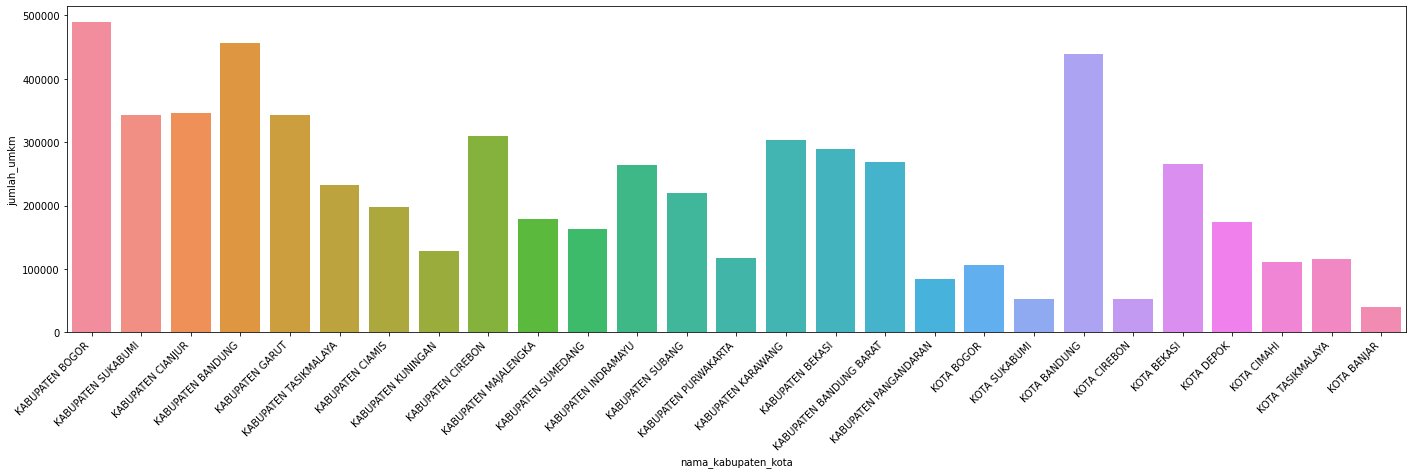

In [46]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=new_data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

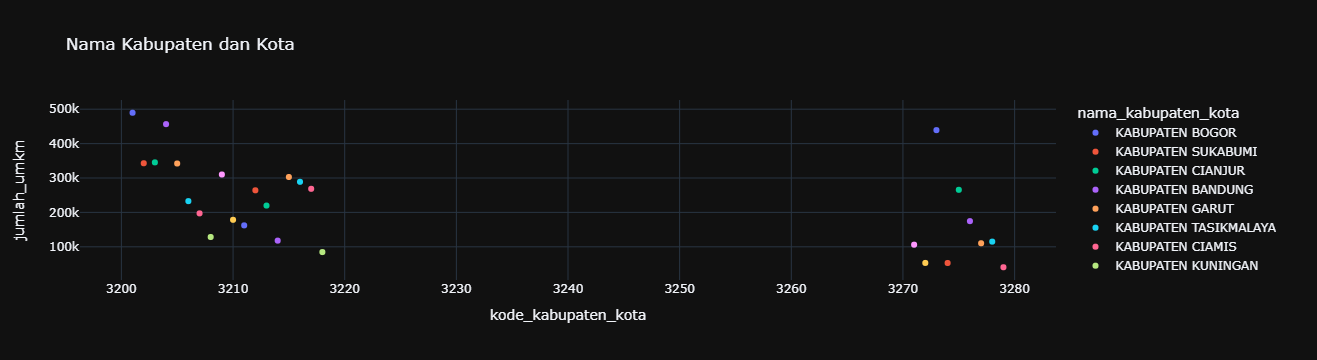

In [47]:
bivariate_visualization_scatter(
    data=new_data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> Nama Kabupaten dan Kota yang memiliki Jumlah UMKM terbanyak di tahun 2022 adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Kesimpulan:**

Hasil prediksi di Tahun 2022, diperkirakan Kota Bandung, Kabupaten Bogor, dan Kabupaten Bandung, akan mengalami penurunan sekitar 5%, dan banyak Kabupaten dan kota mengalami penurunan, ini mungkin dikarenakan PSBB dan PPKM yang sangat ketat di setiap daerah, dan juga, sedikitnya masyarakat yang tahu akan Internet dan Teknologi, hal ini bisa diatasi bila produk yang di miliki masyarakat sekiranya bisa menggunakan Internet untuk berjualan di toko" online, seperti Tokopedia, Shopee, dll, dan juga bisa di jual di Sosial Media seperti Instagram dan Facebook, tetapi sayangnya, lebih banyak yang masyarakat menggunakan Sosial Media ini hanya untuk Membuat Status, Posting dan Chat" saja, padahal Sosial Media ini bisa di Manfaatkan untuk Mempronosikan Produk yang kita miliki.

In [49]:
data_umkm_kabupaten_kota = pd.concat([data_copy, new_data], ignore_index=True) # concat data

del data_umkm_kabupaten_kota['id'] # hapus kolom id

data_umkm_kabupaten_kota # review data

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_umkm,satuan,tahun
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,375048.00,UNIT,2016
1,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,269002.00,UNIT,2016
2,32,JAWA BARAT,3203,KABUPATEN CIANJUR,250808.00,UNIT,2016
3,32,JAWA BARAT,3204,KABUPATEN BANDUNG,353277.00,UNIT,2016
4,32,JAWA BARAT,3205,KABUPATEN GARUT,259141.00,UNIT,2016
...,...,...,...,...,...,...,...
184,32,JAWA BARAT,3275,KOTA BEKASI,265719.53,UNIT,2022
185,32,JAWA BARAT,3276,KOTA DEPOK,174671.76,UNIT,2022
186,32,JAWA BARAT,3277,KOTA CIMAHI,110366.70,UNIT,2022
187,32,JAWA BARAT,3278,KOTA TASIKMALAYA,115139.24,UNIT,2022


In [50]:
data_umkm_kabupaten_kota.to_csv('data_umkm_kabupaten_kota_tahun_2022.csv', index=False) # export data